In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from pprint import pprint
import re


In [184]:
dataset = pd.read_csv("./data_df/dataset_df__13-features__price.csv")

In [3]:
dataset.head()

,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,price
0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,يد اولى,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,100000
1,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,60000
2,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,43500
3,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,00,\n\nمُكيّف\nمسجل CD\n\n,5500
4,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغن...,54000


In [4]:
# shape of the data
dataset.shape

(6864, 14)

In [5]:
# information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   لون السيارة   6864 non-null   object
 1   نوع الوقود    6864 non-null   object
 2   أصل السيارة   6864 non-null   object
 3   رخصة السيارة  6864 non-null   object
 4   نوع الجير     6864 non-null   object
 5   الزجاج        6864 non-null   object
 6   قوة الماتور   6864 non-null   int64 
 7   عداد السيارة  4923 non-null   object
 8   عدد الركاب    6087 non-null   object
 9   وسيلة الدفع   6864 non-null   object
 10  معروضة        6864 non-null   object
 11  أصحاب سابقون  5214 non-null   object
 12  إضافات        6864 non-null   object
 13  price         6864 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 750.9+ KB


In [24]:
dataset

,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,قوة الماتور,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات,price
0,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,4+1,نقدا فقط,للبيع فقط,1.0,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,100000
1,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,7+1,إمكانية التقسيط,للبيع أو التبديل,2.0,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,60000
2,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,NaN,NaN,نقدا فقط,للبيع فقط,NaN,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,43500
3,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,4+1,إمكانية التقسيط,للبيع فقط,0.0,\n\nمُكيّف\nمسجل CD\n\n,5500
4,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,4+1,نقدا فقط,للبيع فقط,NaN,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغن...,54000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,4+1,إمكانية التقسيط,للبيع فقط,2.0,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nجنطات مغن...,45000
6860,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,7+1,نقدا فقط,للبيع فقط,5.0,\n\n\n,48000
6861,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,4+1,نقدا فقط,للبيع فقط,0.0,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,87000
6862,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,6+1,نقدا فقط,للبيع فقط,2.0,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...,126000


In [6]:
# Observe null values proportion for each feature
df_null = dataset.isnull().mean()
df_null.sort_values(ascending=False).head()


عداد السيارة    0.282780
أصحاب سابقون    0.240385
عدد الركاب      0.113199
لون السيارة     0.000000
نوع الوقود      0.000000
dtype: float64

In [80]:
# description of the data
dataset.describe()

,price
count,6864.000000
mean,66933.643211
std,57022.973482
min,1111.000000
25%,36000.000000
50%,55000.000000
75%,83000.000000
max,999999.000000


In [233]:
categorical_data = dataset.select_dtypes(['object']).copy() 
categorical_data.describe()

,لون السيارة,نوع الوقود,أصل السيارة,رخصة السيارة,نوع الجير,الزجاج,عداد السيارة,عدد الركاب,وسيلة الدفع,معروضة,أصحاب سابقون,إضافات
count,6832,6832,6832,6832,6832,6832,4902,6055,6832,6832,5187,6832
unique,26,4,6,2,3,2,1256,11,2,3,357,196
top,أبيض,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,100000,5,نقدا فقط,للبيع فقط,يد اولى,\n\nمُكيّف\nإغلاق مركزي\nجهاز إنذار\nمسجل CD\n...
freq,1434,3962,5811,6762,3610,6311,107,4910,4301,4185,501,1249


###### Observe that numeric features stored as string.... need to be handled

In [79]:
for feature in dataset:
    print(f'Feature: {feature}\n{dataset[feature].nunique()}: {dataset[feature].unique()}\n')

Feature: لون السيارة
26: ['أبيض عاجي ' 'سكني ' 'بيج ' 'فضي ' 'أسود ' 'بترولي ' 'أبيض '
 'أسود ميتالك ' 'ذهبي ' 'فيراني ' 'أحمر ' 'أزرق ' 'أزرق سماوي ' 'رمادي '
 'عدة الوان ' 'رصاصي ' 'برتقالي ' 'أخضر ' 'بني ' 'خمري ' 'كحلي ' 'زيتي '
 'بنفسجي ' 'جيشي ' 'أصفر ' 'كرميدي ']

Feature: نوع الوقود
4: ['بنزين ' 'ديزل ' 'هايبرد ' 'كهرباء ']

Feature: أصل السيارة
6: ['خصوصي ' 'عمومي ' 'تأجير ' 'تجاري ' 'تدريب سياقة ' 'حكومي ']

Feature: رخصة السيارة
2: ['فلسطينية ' 'نمرة صفراء ']

Feature: نوع الجير
3: ['اوتوماتيك ' 'نصف اوتوماتيك ' 'عادي ']

Feature: الزجاج
2: ['الكتروني ' 'يدوي ']

Feature: قوة الماتور
144: ['2000 ' '2500 ' '1600 ' '906 ' '1200 ' '1400 ' '4500 ' '1800 ' '2200 '
 '1250 ' '1300 ' '1500 ' '1100 ' '3700 ' '1235 ' '1900 ' '2400 ' '1000 '
 '125 ' '800 ' '220 ' '420 ' '1999 ' '3600 ' '3000 ' '1850 ' '4800 '
 '200 ' '3100 ' '2300 ' '3500 ' '1150 ' '3200 ' '4000 ' '300 ' '2800 '
 '390 ' '1995 ' '900 ' '1990 ' '2008 ' '2700 ' '5985 ' '2900 ' '903 '
 '1595 ' '7000 ' '250 ' '270 ' '6500 '

In [51]:
dict_features_unique_values = {}
for feature in dataset:
    dict_features_unique_values[feature] = (dataset[feature].nunique(), dataset[feature].unique())
    
dict_features_unique_values

{'لون السيارة': (26,
  array(['أبيض عاجي ', 'سكني ', 'بيج ', 'فضي ', 'أسود ', 'بترولي ', 'أبيض ',
         'أسود ميتالك ', 'ذهبي ', 'فيراني ', 'أحمر ', 'أزرق ',
         'أزرق سماوي ', 'رمادي ', 'عدة الوان ', 'رصاصي ', 'برتقالي ',
         'أخضر ', 'بني ', 'خمري ', 'كحلي ', 'زيتي ', 'بنفسجي ', 'جيشي ',
         'أصفر ', 'كرميدي '], dtype=object)),
 'نوع الوقود': (4,
  array(['بنزين ', 'ديزل ', 'هايبرد ', 'كهرباء '], dtype=object)),
 'أصل السيارة': (6,
  array(['خصوصي ', 'عمومي ', 'تأجير ', 'تجاري ', 'تدريب سياقة ', 'حكومي '],
        dtype=object)),
 'رخصة السيارة': (2, array(['فلسطينية ', 'نمرة صفراء '], dtype=object)),
 'نوع الجير': (3,
  array(['اوتوماتيك ', 'نصف اوتوماتيك ', 'عادي '], dtype=object)),
 'الزجاج': (2, array(['الكتروني ', 'يدوي '], dtype=object)),
 'قوة الماتور': (144,
  array([2000, 2500, 1600,  906, 1200, 1400, 4500, 1800, 2200, 1250, 1300,
         1500, 1100, 3700, 1235, 1900, 2400, 1000,  125,  800,  220,  420,
         1999, 3600, 3000, 1850, 4800,  200, 3100, 23

###### Observe having plenty inconsistent data in the features needed to be handled

Handle inconsistent data in 'عدد الركاب' feature

In [207]:
# Observe number of samples with no '+' sign along with their values
no_sum = []
no_sum_indices = []
for indx, car_passengers in enumerate(dataset['عدد الركاب']):
    if car_passengers is not np.nan and '+' not in car_passengers:
            print('\n', car_passengers, '\n')
            if '±' not in car_passengers:
                no_sum_indices.append(indx)
                no_sum.append((indx, car_passengers))


 8  


 ٧  


 7:1  


 6±١  


 22  


 ٧  


 7.1  


 ٧  


 7 =1  


 6x1      


 2/1  


 2  


 1٠4  


 4\١  


 000  


 1  


 1  


 اكثر من 10  


 اكثر من 10  


 1  


 1  


 1  


 1  


 اكثر من 10  


 اكثر من 10  


 1  


 1  


 اكثر من 10  


 اكثر من 10  


 اكثر من 10  


 اكثر من 10  


 اكثر من 10  


 1  



In [223]:
print(no_sum_indices, end='')

[9, 37, 51, 190, 288, 335, 356, 391, 462, 576, 621, 694, 704, 748, 934, 1204, 1304, 1692, 2182, 2699, 2783, 3721, 4016, 4189, 4500, 4642, 4661, 5029, 5296, 5776, 5806, 6762]

In [221]:
print(len(no_sum))
print(no_sum, end='')

32
[(9, '8 '), (37, '٧ '), (51, '7:1 '), (190, '22 '), (288, '٧ '), (335, '7.1 '), (356, '٧ '), (391, '7 =1 '), (462, '6x1     '), (576, '2/1 '), (621, '2 '), (694, '1٠4 '), (704, '4\\١ '), (748, '000 '), (934, '1 '), (1204, '1 '), (1304, 'اكثر من 10 '), (1692, 'اكثر من 10 '), (2182, '1 '), (2699, '1 '), (2783, '1 '), (3721, '1 '), (4016, 'اكثر من 10 '), (4189, 'اكثر من 10 '), (4500, '1 '), (4642, '1 '), (4661, 'اكثر من 10 '), (5029, 'اكثر من 10 '), (5296, 'اكثر من 10 '), (5776, 'اكثر من 10 '), (5806, 'اكثر من 10 '), (6762, '1 ')]

In [214]:
for indx, car_passengers in enumerate(dataset['عدد الركاب']):
    if (car_passengers is not np.nan):
        if ('+' in car_passengers):
            car_passengers_number = car_passengers.split('+')
            sum = 0
            for val in car_passengers_number:
                val = val.strip(" ,")
                if val.isdigit():
                    sum += int(val)
            dataset['عدد الركاب'].iloc[indx] = sum
            print(indx, dataset['عدد الركاب'].iloc[indx])

        elif car_passengers.isdigit():
            dataset['عدد الركاب'].iloc[indx] = int(car_passengers.strip())

0 || 4+1  <class 'str'>
0 5
1 || 7+1  <class 'str'>
1 8
2 || nan <class 'float'>
3 || 4+1   <class 'str'>
3 5
4 || 4+1  <class 'str'>
4 5
5 || 5+1  <class 'str'>
5 6
6 || ٤+١  <class 'str'>
6 5
7 || 4+1  <class 'str'>
7 5
8 || nan <class 'float'>
9 || 8  <class 'str'>
10 || 7+1  <class 'str'>
10 8
11 || 4+1  <class 'str'>
11 5
12 || 4+1  <class 'str'>
12 5
13 || 4+1  <class 'str'>
13 5
14 || nan <class 'float'>
15 || 4+1  <class 'str'>
15 5
16 || nan <class 'float'>
17 || 6+1  <class 'str'>
17 7
18 || 4+١  <class 'str'>
18 5
19 || 4+1  <class 'str'>
19 5
20 || 6+1  <class 'str'>
20 7
21 || 4+1  <class 'str'>
21 5
22 || 4+1  <class 'str'>
22 5
23 || 4+1  <class 'str'>
23 5
24 || 4+1  <class 'str'>
24 5
25 || 4+1  <class 'str'>
25 5
26 || 4+1  <class 'str'>
26 5
27 || nan <class 'float'>
28 || 4+1  <class 'str'>
28 5
29 || 4+1  <class 'str'>
29 5
30 || 4+1  <class 'str'>
30 5
31 || 4+1  <class 'str'>
31 5
32 || 6+1  <class 'str'>
32 7
33 || 4+1  <class 'str'>
33 5
34 || 6+1  <class 'str'

C:\Users\DELL\AppData\Local\Temp\ipykernel_13988\3286506565.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['عدد الركاب'].iloc[indx] = sum


647 5
648 || 4+1  <class 'str'>
648 5
649 || 5+1  <class 'str'>
649 6
650 || nan <class 'float'>
651 || nan <class 'float'>
652 || nan <class 'float'>
653 || 4+1  <class 'str'>
653 5
654 || 6+١  <class 'str'>
654 7
655 || 4+1  <class 'str'>
655 5
656 || ١+٤  <class 'str'>
656 5
657 || 5+1  <class 'str'>
657 6
658 || nan <class 'float'>
659 || nan <class 'float'>
660 || 4+1  <class 'str'>
660 5
661 || 4+1  <class 'str'>
661 5
662 || 4+1  <class 'str'>
662 5
663 || 4+1  <class 'str'>
663 5
664 || 4+1  <class 'str'>
664 5
665 || 4+1  <class 'str'>
665 5
666 || 4+1  <class 'str'>
666 5
667 || ٤+١  <class 'str'>
667 5
668 || nan <class 'float'>
669 || 4+1  <class 'str'>
669 5
670 || 6+1  <class 'str'>
670 7
671 || ٦+١  <class 'str'>
671 7
672 || 1+2  <class 'str'>
672 3
673 || 4+1  <class 'str'>
673 5
674 || 4+1  <class 'str'>
674 5
675 || 6+1  <class 'str'>
675 7
676 || nan <class 'float'>
677 || 4+1  <class 'str'>
677 5
678 || 4+1  <class 'str'>
678 5
679 || 4+١  <class 'str'>
679 5
680 |

In [218]:
dataset = dataset.drop(labels=no_sum_indices, axis=0)

In [220]:
# Observe the shape of the data to asure deleting 32 samples
dataset.shape

(6832, 14)

In [231]:
list(dataset['عداد السيارة'].unique())

['75000 ',
 '130000 ',
 nan,
 'شغال ',
 '38000 ',
 '١٢٣٤٥٦ ',
 '50000 ',
 '460000 ',
 '45000 ',
 '70000 ',
 '79000 ',
 '000 ',
 '150 الف  ',
 '210000 ',
 '1 ',
 '20000 ',
 '00000000000000000 ',
 '113000 ',
 '33000 ',
 '122,000 ',
 '00000000000000 ',
 '22000 ',
 '150000 ',
 '29000 ',
 '123457 ',
 '140000 ',
 '122000 ',
 '78000 ',
 '00000 ',
 '900000 ',
 '7 ',
 '00000000 ',
 '65000 ',
 '_ ',
 '190 ',
 '- ',
 '184000 ',
 '200 ',
 '30000 ',
 '295000 ',
 '60000 ',
 '143212 ',
 '43000 ',
 '71 ',
 '160000 ',
 '4000 ',
 '121000 ',
 '9900 ',
 '56000 ',
 '٢٦٠ ',
 '0000 ',
 '80 الف ',
 '200000 ',
 '60 ',
 '124000 ',
 '120000قابل لزيادة  ',
 '100000 ',
 '90000 ',
 '000000 ',
 '99 ',
 '82000 ',
 '32123123 ',
 '120 الف ',
 '166000 ',
 '275000 ',
 '82700 ',
 '123000 ',
 '120000 ',
 '500000 ',
 '18000000 ',
 '١٥٠ ',
 '80000 ',
 '87000 ',
 '110000 ',
 '350000 ',
 '700000 ',
 '55 ',
 '٤٠٠٠٠٠ ',
 '35000 ',
 '380000 ',
 '167000 ',
 '140 ',
 '160 ',
 '123456789 ',
 '111111 ',
 '94000 ',
 '90 ',
 '46000 ',


<AxesSubplot: >

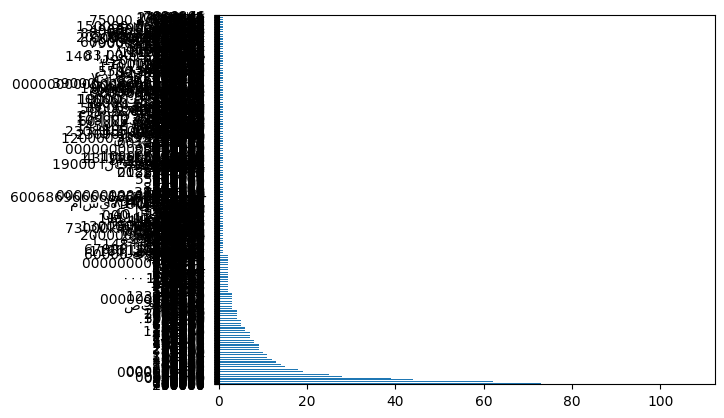

In [35]:
dataset['عداد السيارة'].value_counts().plot.barh()

Handle inconsistent data in 'أصحاب سابقون' feature

In [8]:
(dataset['أصحاب سابقون'].nunique(), dataset['أصحاب سابقون'].unique())

(360,
 array(['يد اولى ', '2 ', nan, '00  ', '0 ', '1 ', 'يد ثانية ', '4 ',
        'يد ثانيه ', '3 ', 'ثالثة ', 'غير منمر استيراد الماني ', '00 ',
        'غير منمرة ', 'أولى ', '٨ ', 'يد اولا ', 'يد ثالثة ', 'يد ثالثة  ',
        'ثانية ', 'يد أولى ', 'يد سادسة ', '5 ', 'اولى  ', 'صفر ', '9 ',
        '0000 ', 'رابعه ', 'يد أولى  ', '٤ ', 'يد رابعة  ', '٢ ',
        'يد ثالثه ', '6 ', 'يد اولى  ', '7 ', '... ', 'يد ثانيه  ',
        'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', '...... ', 'ثانيه ',
        'واحد ', 'اربعة ', 'اولا ', '٣ ', 'غير منمره ', 'يد تالته ', '٦ ',
        'يد رابعه ', 'يد ثالثة ( فتيات) ', '159000 ', '12 ', '- ',
        'مش منمر ', '0 مستورده ', 'يد تانيه ', '10 ', 'يد 1 ', 'مستورد ',
        'يد 4 ', 'يد رابعة ', '00000 ', '١ ', 'استيراد مباشر من كوريا  ',
        'يد خامسة ', '٥ ', 'يد 5 ', '******** ', 'نعم ', 'مش منمرة  ',
        'يد 3 ', ' يد ثانيه ', 'يداولى ', '4  ', 'يد أولى وكالة ',
        'يد خامسه ', 'يد ثانية  ', '٩ ', '٧ ', 'يدو اولى ', 'للبيع  '

In [9]:
pre_drivers_0 = ['00  ', '0 ', '00 ', 'صفر ', '0000 ', '00000 ', '0 مستورده ', '0مستورد ', 
       'يد صفر  ', 'يد صفر ', '0استيراد  ', '000000 ', 'اصحاب سابقون صفر ', '000 ', 
       'صفر  ', 'صفرض ', '0 مستورد كوري ', '00000000 ', 'يد أولئ أصحاب سابقون صفر ', 
       'يد 0 ', 'صفرر ', '، 0 ', ' 0 ', '0 استيراد كوري  ', '0000000 ', ' 00 ', 'مش منمر . (صفر) ', 
       '0 استيراد  ', '٠ ', '٠٠٠٠ ', '٠٠٠٠٠٠٠٠٠ ', '٠٠٠٠٠٠ ', '٠٠٠٠٠٠٠٠٠٠ ', '٠٠ ','٠٠٠٠٠٠٠٠ ' ,
       '٠٠٠٠٠ ', '٠٠٠٠٠٠٠ ', '... ', '...... ', '......... ', 'Zero ', 'لا يوجد ', '. ', 'لايوجد ', 
       '.... ', 'من الشركه مباشر لا يوجد اصحاب سابقون ', 'Ooo ', 'استيراد كوريا - جديد مش منمر ', 
       '  O ',  '.. ', 'لا شيء ', 'O '
       ]

pre_drivers_1 = ['1 ', 'يد اولى ', 1, 'يد. اولى', 'واحد ', 'اولا ', '١ ',
      'أولى ', 'يد أولى ', 'اولى  ', 'يد أولى  ', 'يد اولى  ', 'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', 'يد 1 ', 'يداولى ', 'يد أولى وكالة ', 'يدو اولى ', 'يد اولى شركة ', 
      'يد. اولى ', 'ياولى ', 'يد اولى وكالة ', 'يد اولى  اصل شركة ', 'يد اولى اصحاب سابقون 0 ', 'أولى  ', 'وارد كوريا يد اولى ', 'يد اولى صفر كيلو  ', 'مستورده يد اولى ', 
      'ايد اولى ', '1  ', 'يد أولى بعد الاستيراد ', 'يد أولى 1 ', 'ايد اولى  ', ' 1 ', 'يد اولى فقط ', 'يد أولى،... ', 'اولى\x89 ', 'فقط يد اولى ', 'يد اولى، استيراد شخصي ', 
      'يدو اولى  ', 'يد اولى ( شركة ) ', 'يدأولى ', 'يداولى سحب شركه ', 'يد اولى استيراد شخصي ', 'ايد أولى  ', '01 ', 'يد اولى الماني  ', 'يد اولىً ', 'يد اولى / استيراد ', 
      '1 أولى  ', 'مستوردة يد اولى ', 'بد اولى مستورد ', 'يد اولى من الشركة المتحدة ',
      'يد اولا ', 'يداولا ', 'يد اولا  ', 'يد ١ ', 'يد  ١ ', 'يد واحد  ', '11111 ', 'يد واله ', 'يد اولئ ', 'يد اولي', 'ايد اوله ', 'يد اولة  ', 
      'اوله  ', 'يد اول',  'يدى اوله  ', 'يد اولي  ', 'اول ', 'يد ولا ', 'يد اول  ', 'يد اولي ', 'اوله ', 'يد ولى ', 'يد أولي ', 'يد اول ', 
      'يد أولئ  ', 'يد ا ', 'يد اوله ', 'يد واحدة  ', 'يد ', 'يد اولة ',  '4 نفس الشخص ', 'يد اةلي '
      ]

pre_drivers_2 = ['2 ', 'يد ثانية ', 'يد ثانيه ', 'ثانية ', '٢ ', 'يد ثانيه  ', 'ثانيه ', 'يد تانيه ', ' يد ثانيه ', 
      'يد ثانية  ', '2  ', 'يد 2 ', 'يدثانيه  ', 'ايد ثانيه ', 'يد ٢ ', ' يد ثانية ', 'يدثانيه ', 'يد تانية ', 
      'ايد 2 ', ' 2 ', 'أيد تانية ', 'يدثانية ', 'تانيه ', '2يد  ', 'يدتانيه ', 'ثانية  ', 'ايد ثانية  ', '2يد ', 
      'يد٢ ', 'يد2 ', 'ايدثانيه ', 'يد  ثانية ', 'يد تانيه  ', 'تانية ', 'الثانية ', 'يد تانية  ', '@ ',
      'اثنان ', 'يد تاني ', 'يد ثني ', 'يد ثاتيه ', 'يد ثاني ', 'ثانبه ', 'يد ثاني.  ', 'تانبه ', 'يد ثانيا ', 
      'تاني  ', 'ثاني ', 'يديانيه ', 'يد ثاني  ',
      ]

pre_drivers_3 = ['3 ', 'ثالثة ', 'يد ثالثة ', 'يد ثالثة  ', 'يد ثالثه ', '٣ ', 'يد تالته ', 'يد ثالثة ( فتيات) ', 
       'يد 3 ', 'ثالثه ', '03 ', 'ثالثة  ', '13 ', 'يد ثالثه  ', 'يد3 ', 'يدثالثة ', 'عدد٣ ', 'تالته ', 
       'يد ٣ ', 'يدثالثه ', 'يد٣ ', 'يد التالته ', ' ايد ثالثه ', 'تالثه ', '3  ', ',3 ', 'ايد ثالثة  ', 'ايد 3 ',
       'يد ثالث ', 'ثالث ', 'ثالثى ',  'يد ثالثي ',
       ]

pre_drivers_4 = ['4 ', 'رابعه ', '٤ ', 'يد رابعة  ', 'اربعة ', 'يد رابعه ', 'يد 4 ', 'يد رابعة ', '4  ', 'رابعة ', 
       'يد4 ', 'يد ٤ بس نخب السيارة ', 'يد ٤ ', 'يد٤ ', 'يد رابعه  ', 'ايد رابعه ', '14 ', '04 ', 'يد اربعه ', 
       'رابعه  ', '٤٤٤٤٤ ']

pre_drivers_5 = ['5 ', 'يد خامسة ', '٥ ', 'يد 5 ', 'يد خامسه ', 'يد خامسة  ', ' 5 ', 'يدخامسه ', 'خامسة ', 
              'يد٥ ', 'خامسه ', 'يد ٥ ', '  5 ', 'يد خامساً  ', 'يد خمسة ', 'خمسه ', 'خمسة ', 'خمس ', ]

pre_drivers_6 = ['يد سادسة ', '6 ', '٦ ', 'يد6 ', '  6 ', 'يد 6 ']

pre_drivers_7 = ['7 ', '٧ ', 'يد سابعة ', 'يد سابعه ', 'يد ٧  ', 'سابعه ']

pre_drivers_8 = ['٨ ', '8 ', '١٨ ', 'يد ثامنه ', 'يد 8 ', 'ثمانيه ']

pre_drivers_9 = ['9 ', '٩ ', '٠٠٠٠٩ ', 'يد ٩  ', 'يد تاسعة ']

pre_drivers_10 = ['10 ', '١٠ ', 'يد عاشره ', 'يد عاشرة ']

pre_drivers_11 = ['11 ', '١١ ']


pre_drivers_12 = ['12 ', '١٢ ']
pre_drivers_15 = ['١٥ ', '15 ']
pre_drivers_16 = ['16 ']
pre_drivers_17 = ['17 ', 'يد ١٧ ', '١٧ ', '١٧', '١٧ ', '١٧ ', 'يد ١٧ ',
              '17 ', 'يد ١٧ ' , '١٧ ', 'يد ١٧ ', '١٧ '
                  ]
pre_drivers_18 = ['18 ']
pre_drivers_19 = ['19 ']

pre_drivers_importation = ['مستورد شركة  ', 'استيراد الماني ', ' استيراد الماني ', 'مستورد ', 'استيراد مباشر من كوريا  ', 
                            'استيراد كوري ', 'مستوردة ', 'استيراد ', 'استيراد كوريا ', 'استيراد مباشر من اوروبا  ', 
                            'وارد المانيا ', 'استراد  ', 'استيراد المانيا ', 'استيراد كوريا  ', 'مستورده  ', 'مستوردة  ',  'أستيراد ألماني  ', 
                            'مستوردة غير مرخصة ', 'استراد شخصي ',
                            'مستورد  ', 'مستورده ', 'استيراد مباشر ', 
                            ]

car_no_number = ['غير منمر استيراد الماني ', 'غير منمرة ', 'غير منمره ', 'مش منمر ', 'مش منمرة  ', 'مش منمرة ', 
              'غير منمر  ', 'مستود غير منمر ', 'مش منمرا ', 'غير منمرة  ', 'غير منمر ', 'مش منمر  ', 'غير منمرمستوردة ',
              'مستوردة غير منمرة ', 'مش منمره '
              ]
pre_drivers_yes_no_number = ['نعم ', ' منمره  ']

null_values = ['- ', '******** ', 'ا ', '********** ', '****** ', '--- ', '؟ ', '? ', 'E ', '، ', 
              'للبيع  ', 'اصل تدريب سواقه  ', 'انا ', 'سحب شركة ', 'شطب ', 'اصل شركة ', 'مشطوب ', 'خصوصي  '
              ]
large_num = ['159000 ', '56 ', '170000 ', '78888877766 ', '0778244 ', '1000 ', '123423 ', '12345 ', 'اشخاص ']

In [10]:
pre_drivers = [pre_drivers_0, pre_drivers_1, pre_drivers_2, pre_drivers_3, pre_drivers_4, 
pre_drivers_5, pre_drivers_6, pre_drivers_7, pre_drivers_8,pre_drivers_9, 
pre_drivers_10, pre_drivers_11, pre_drivers_12, pre_drivers_15, pre_drivers_16, 
pre_drivers_17, pre_drivers_18, pre_drivers_19, null_values, car_no_number,
pre_drivers_yes_no_number, large_num, pre_drivers_importation]

In [11]:
dict_pre_drivers = {
  **dict.fromkeys(pre_drivers_0, 0), 
  **dict.fromkeys(car_no_number, 0), 
  **dict.fromkeys(pre_drivers_yes_no_number, 0), 
  **dict.fromkeys(pre_drivers_importation, 0),
  **dict.fromkeys(pre_drivers_1, 1), 
  **dict.fromkeys(pre_drivers_2, 2), 
  **dict.fromkeys(pre_drivers_3, 3), 
  **dict.fromkeys(pre_drivers_4, 4), 
  **dict.fromkeys(pre_drivers_5, 5), 
  **dict.fromkeys(pre_drivers_6, 6), 
  **dict.fromkeys(pre_drivers_7, 7), 
  **dict.fromkeys(pre_drivers_8, 8), 
  **dict.fromkeys(pre_drivers_9, 9), 
  **dict.fromkeys(pre_drivers_10, 10), 
  **dict.fromkeys(pre_drivers_11, 11), 
  **dict.fromkeys(pre_drivers_12, 12), 
  **dict.fromkeys(pre_drivers_15, 15), 
  **dict.fromkeys(pre_drivers_16, 16),
  **dict.fromkeys(pre_drivers_17, 17),
  **dict.fromkeys(pre_drivers_18, 18), 
  **dict.fromkeys(pre_drivers_19, 19),
  **dict.fromkeys(null_values, np.NaN), 
  **dict.fromkeys(large_num, np.NaN), 
  # **dict.fromkeys((np.NaN), None),
}

In [315]:
f = dataset['أصحاب سابقون'].replace(dict_pre_drivers)

In [316]:
print(f.nunique(), f.unique())

18 [ 1.  2. nan  0.  4.  3.  8.  6.  5.  9.  7. 12. 10. 11. 16. 17. 15. 18.
 19.]


In [47]:
dict_features_unique_values['أصحاب سابقون']

(360,
 array(['يد اولى ', '2 ', nan, '00  ', '0 ', '1 ', 'يد ثانية ', '4 ',
        'يد ثانيه ', '3 ', 'ثالثة ', 'غير منمر استيراد الماني ', '00 ',
        'غير منمرة ', 'أولى ', '٨ ', 'يد اولا ', 'يد ثالثة ', 'يد ثالثة  ',
        'ثانية ', 'يد أولى ', 'يد سادسة ', '5 ', 'اولى  ', 'صفر ', '9 ',
        '0000 ', 'رابعه ', 'يد أولى  ', '٤ ', 'يد رابعة  ', '٢ ',
        'يد ثالثه ', '6 ', 'يد اولى  ', '7 ', '... ', 'يد ثانيه  ',
        'يد أولى استيراد ', 'يد اولي 1 ', 'اولى ', '...... ', 'ثانيه ',
        'واحد ', 'اربعة ', 'اولا ', '٣ ', 'غير منمره ', 'يد تالته ', '٦ ',
        'يد رابعه ', 'يد ثالثة ( فتيات) ', '159000 ', '12 ', '- ',
        'مش منمر ', '0 مستورده ', 'يد تانيه ', '10 ', 'يد 1 ', 'مستورد ',
        'يد 4 ', 'يد رابعة ', '00000 ', '١ ', 'استيراد مباشر من كوريا  ',
        'يد خامسة ', '٥ ', 'يد 5 ', '******** ', 'نعم ', 'مش منمرة  ',
        'يد 3 ', ' يد ثانيه ', 'يداولى ', '4  ', 'يد أولى وكالة ',
        'يد خامسه ', 'يد ثانية  ', '٩ ', '٧ ', 'يدو اولى ', 'للبيع  '

In [12]:
dataset['أصحاب سابقون'].replace(dict_pre_drivers, inplace=True)

In [15]:
print(f"{dataset['أصحاب سابقون'].nunique()} => {dataset['أصحاب سابقون'].unique()}")

18 => [ 1.  2. nan  0.  4.  3.  8.  6.  5.  9.  7. 12. 10. 11. 16. 17. 15. 18.
 19.]
